## Resolution de l'équation  -Laplacien(U)=f en utilisant la methode de difference finie

### les imports

In [ ]:

%autosave 300
import numpy as np
from matplotlib.pylab import *
import time
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

[0.33333333 0.66666667 0.33333333 0.66666667]
[0.33333333 0.33333333 0.66666667 0.66666667]


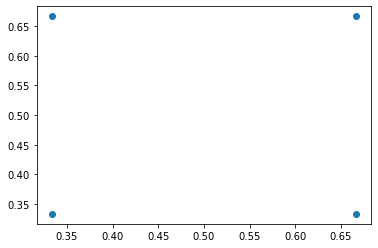

In [2]:
# taille du domaine [0,L]x[0,H]
L=1.;
H=1.;
# nombre de points de discretisation internes et pas de maillage
N=2;
M=2;
l=L/(N+1);
h=H/(M+1);
# vecteur discretisation selon x
x=linspace(l,L-l,N)

# vecteur discretisation selon y
y=linspace(h,H-h,M)
xx=M*list(x)
xx=array(xx)
print(xx)
yy=N*list(y)
yy=array(yy).reshape(N,M)

yy=yy.T

yy=yy.reshape(N*M)
print(yy)
plot(xx,yy,'o')

In [3]:



class Df_2D:
    def __init__(self):
        self.a = 0
        self.x = None
        self.y = None
    
    def discretisation(n,m):
        L=1
        H=1
        #cette methode renvoi X et Y qui sont des vecteurs
        # de discretisation selon x et y respectivement
        l=L/(N+1);
        h=H/(M+1);
        # vecteur discretisation selon x
        x=linspace(l,L-l,N)
        # vecteur discretisation selon y
        y=linspace(h,H-h,M)
        return x,y
    def calcul(f,g,n,m):
        # f est la fonction second membre
        # g coincide avec u aux bords
        # taille du domaine [0,L]x[0,H]
        L=1.;
        H=1.;
        
        
        # nombre de points de discretisation et pas de maillage
        N=n;
        M=m;
        l=L/(N+1);
        h=H/(M+1);
         # vecteur discretisation selon x
        x=linspace(l,L-l,N)
        # vecteur discretisation selon y
        y=linspace(h,H-h,M)
        #construction de la matrice A par ses diagonales 
        #
        D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
        D1=-1/l**2*ones(N*M)# surdiagonale
        D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
        DM1=-1/l**2*ones(N*M)# sousdiagonale
        DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
        DN=-1/h**2*ones(N*M)
        A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
        A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)# A est pentadiagonale
        #construction du second membre
        b=0*ones(N*M)
        k=0
        for j in range(1,M+1,1):
            for i in range (1,N+1,1):
                b[k]=f(x[i-1],y[j-1])
                if i==1:
                     b[k]=b[k]+g(0,y[j-1])/l**2
                if j==1:
                    b[k]=b[k]+g(x[i-1],0)/h**2
                if i==N:
                    b[k]=b[k]+g(L,y[j-1])/l**2
                if j==M:
                    b[k]=b[k]+g(x[i-1],H)/h**2

                k=k+1
        
        
        #
        #resolution du systeme lineaire creux
        #
        #print(A.toarray())
        #print(b)
        u=spsolve(A,b) 
        return u
    def courbe(u,g,N,M):
        # g est la fonction qui coincide avec u aux bords
         #uu=matrix(u,N,M)# permet de reconstruire uu comme un tableau a 2 indices, 
                        #uu(i,j)=u(k), avec k la numerotation de TD
        # representation graphique de la solution
        L=1
        H=1
        #cette methode renvoi X et Y qui sont des vecteurs
        # de discretisation selon x et y respectivement
        l=L/(N+1);
        h=H/(M+1);
        # vecteur discretisation selon x
        x=linspace(l,L-l,N)
        # vecteur discretisation selon y
        y=linspace(h,H-h,M)
        uu=reshape(u,(M,N))
        #x_y = self.discretisation(N, M)
        
        x = np.copy(x[0:N+1])
        y = np.copy(y[0:M+1])
    
        """Création de grille"""
        X, Y = np.meshgrid(x,y)

        """Tracer des courbes sur un même graphe"""
        fig = plt.figure(figsize=(10,6))
        #ax = plt.axes(projection='3d')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Représentation u_approché")
        plt.savefig("Représentation_u_approche_n_m.jpg")
        plt.contourf(X, Y, uu, 50, cmap='RdGy')
        plt.colorbar();
        #ax.contour3D(X,Y,uu,50,cmap='plasma')
        #ax.set_zlabel("u_exacte et u_approche")
        """"uubord=0*ones((M+2,N+2));
        uubord[1:M+1,1:N+1]=uu;
        #remplissage de valeurs au bord
        
        for j in range(N+2):
            uubord[0,j]=g(0,j)
            uubord[M+1,j]=g(M+1,j)
            
        for i in range(M+2):
            uubord[i,0]=g(i,0)
            uubord[i,N+1]=g(M+1,j)
        #print(A.toarray())
        from mpl_toolkits import mplot3d
        ax = plt.axes(projection='3d')
        X, Y = meshgrid(linspace(0,L,N+2),linspace(0,H,M+2))
        ax = plt.axes(projection='3d')
        #ax.contour3D(X, Y, uubord, 50, cmap='binary')
        ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none', );
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('u');
        ax.view_init(20, -125)"""
        return
                


In [4]:
class Test:
    
    #test1
    #definition de la fonction f ( le scond membre)
    def f1(x,y):
        return math.cos(x)+math.sin(y)
    
    #definition de la fonction g(valeur de u au bord)
    def g1(x,y):
        return math.cos(x)+math.sin(y)
    
     #test2
    #definition de la fonction f ( le scond membre)
    def f2(x,y):
        return -4
    
    #definition de la fonction g(valeur de u au bord)
    def g2(x,y):
        return (x**2 +y**2)
    
    #fonction permettant de calculer la valeur exact
    def valeurExact(f,N,M):
        l=1/(N+1);
        h=1/(M+1);
        # vecteur discretisation selon x
        x=linspace(l,1-l,N)
        # vecteur discretisation selon y
        y=linspace(h,1-h,M)
        exact=0*ones(N*M)
        k=0
        for j in range(M):
            for i in range(N):
                exact[k]=f(x[i],y[j])
                k=k+1
        return exact
    #fonction retournant l'erreur
    
    def erreur(u_exact,u_appr,n):
        erreur=0*ones(n)
        for i in range(n):
            erreur[i]=abs(u_appr[i]-u_exact[i])
        return erreur




 ### premier scenario de test :
 
 #### f(x,y)=cos(x)+sin(y) =g(x,y)=valeur de u aux bords

In [5]:
#chargement  des données de test
f=Test.f1
g=Test.g1
N=500
M=500
u_appr=Df_2D.calcul(f,g,N,M)
u_exact=Test.valeurExact(g,N,M)
err=Test.erreur(u_exact,u_appr,N*M)
print('la valeur de l erreur:    {0}'.format(np.linalg.norm(u_exact-u_appr)/np.linalg.norm(u_exact)))

la valeur de l erreur:    1.3688841357812834e-08


### courbe de u exacte 

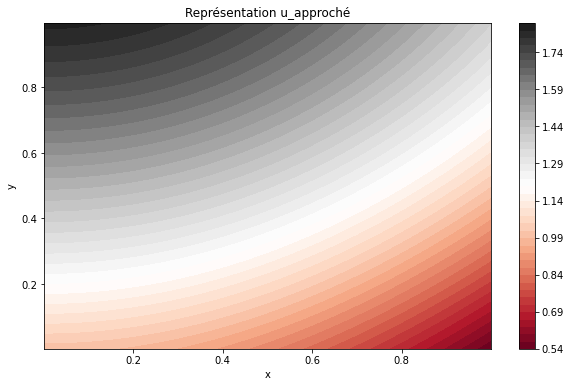

In [6]:
Df_2D.courbe(u_exact,g,N,M)

### courbe de u approchée

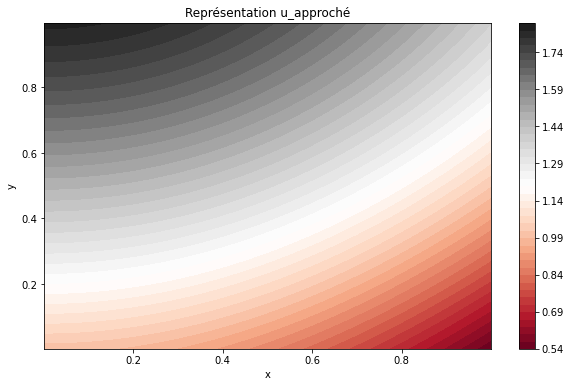

In [7]:
Df_2D.courbe(u_appr,g,N,M)

### courbe d'erreur

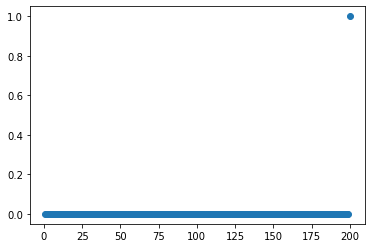

In [8]:
#chargement  des données de test
#calcul d'erreur pour un maillage carré variant de 1 a 200
N=200
M=200
f=Test.f1
g=Test.g1
v=ones(N)
u=ones(N)
v=[j for j in range(1,N+1)]
k=0
for i in range(2,N+1):
    u_appr=Df_2D.calcul(f,g,i,i)
    u_exact=Test.valeurExact(g,i,i)
    u[k]=max(abs(u_appr-u_exact))
    k=k+1

plot(v,u,'o')

### vitesse de convergence 

In [9]:
a=np.polyfit(np.log(v),np.log(u),1)[0]
a

-1.727104586647333

 ### deuxième scénario de test :
 
 #### f(x,y)=-4
 ### g(x,y)=x²+y²=u aux bords

In [10]:
#chargement  des données de test
f=Test.f2
g=Test.g2
N=500
M=500
u_appr=Df_2D.calcul(f,g,N,M)
u_exact=Test.valeurExact(g,N,M)
err=Test.erreur(u_exact,u_appr,N*M)
print('la valeur de l erreur:    {0}'.format(np.linalg.norm(u_exact-u_appr)/np.linalg.norm(u_exact)))

la valeur de l erreur:    8.478168195803498e-13


# Représentation U_exact

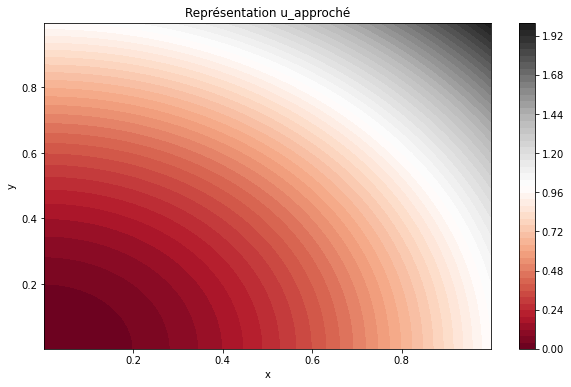

In [11]:
Df_2D.courbe(u_exact,g,N,M)

# Représentation U_approchée

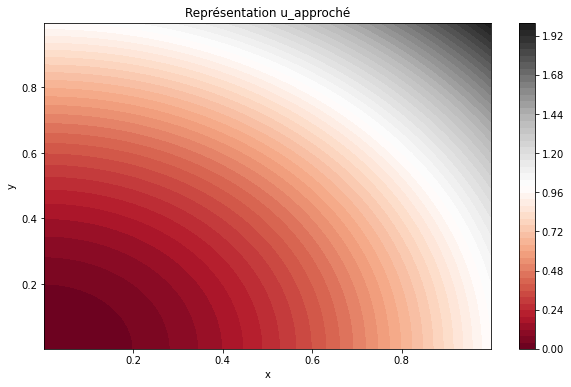

In [12]:
Df_2D.courbe(u_appr,g,N,M)

### courbe erreur

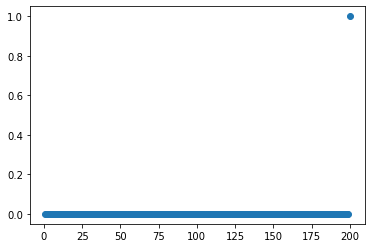

In [13]:
#chargement  des données de test
#calcul d'erreur pour un maillage carré variant de 1 a 200
N=200
M=200
f=Test.f2
g=Test.g2
v=ones(N)
u2=ones(N)
v2=[j for j in range(1,N+1)]
k=0
for i in range(2,N+1):
    u_appr=Df_2D.calcul(f,g,i,i)
    u_exact=Test.valeurExact(g,i,i)
    u2[k]=max(abs(u_appr-u_exact))
    k=k+1

plot(v2,u2,'o')

### courbe de u exact

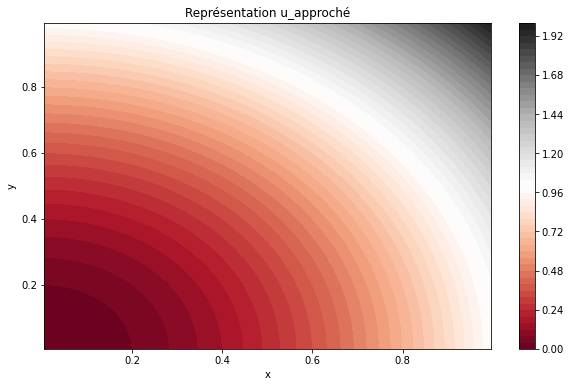

In [14]:
Df_2D.courbe(u_exact,g,N,M)

### vitesse de convergence

In [ ]:
b=np.polyfit(np.log(v2),np.log(u2),1)[0]
b

### test avec u(x,y)=x³

In [16]:
def g3(x,y):
    return x + y

def f3(x,y):
    return 0


N=100
M=100
u_appr=Df_2D.calcul(f3,g3,N,M)
u_exact=Test.valeurExact(g3,N,M)
err=Test.erreur(u_exact,u_appr,N*M)
print('la valeur exact:    {0}'.format(u_exact))
print('la valeur approchée:{0}'.format(u_appr))
print('le vecteur de l\'erreur:{0}'.format(abs(u_appr-u_exact)))
print(max(abs(u_appr-u_exact)))


la valeur exact:    [0.01980198 0.02970297 0.03960396 ... 1.96039604 1.97029703 1.98019802]
la valeur approchée:[0.01980198 0.02970297 0.03960396 ... 1.96039604 1.97029703 1.98019802]
le vecteur de l'erreur:[6.93889390e-18 3.46944695e-18 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.199040866595169e-14


In [17]:
### courbe de u exact

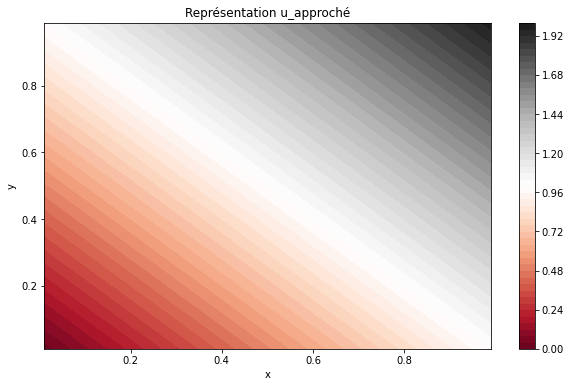

In [18]:
Df_2D.courbe(u_exact,g3,N,M)

###  courbe de u approchée

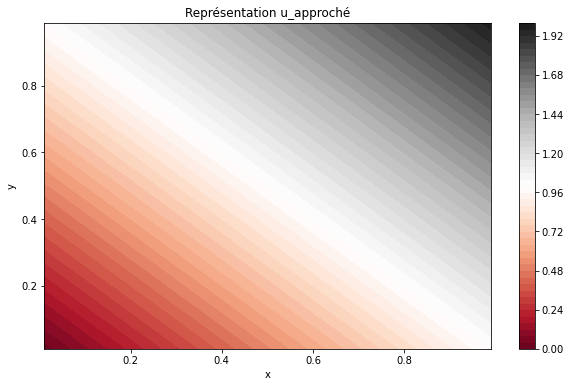

In [19]:
Df_2D.courbe(u_appr,g3,N,M)

### courbe d'erreur

In [ ]:
 #chargement  des données de test
#calcul d'erreur pour un maillage carré variant de 1 a 200
N=1000
M=1000
v=ones(N)
u2=ones(N)
v2=[j for j in range(1,N+1)]
k=0
for i in range(2,N+1):
    u_appr=Df_2D.calcul(f3,g3,i,i)
    u_exact=Test.valeurExact(g3,i,i)
    u2[k]=max(abs(u_appr-u_exact))
    k=k+1

plot(v2,u2,'o')
print(v2)
print(u2)
print(np.polyfit(np.log(v2),np.log(u2),1))

###  vitesse de convergence

In [31]:
np.polyfit(np.log(v2),np.log(u2),1)

<ipython-input-31-ef236d58fa07>:1: RuntimeWarning: divide by zero encountered in log
  np.polyfit(np.log(v2),np.log(u2),1)


array([nan, nan])

 ### test avec u(x,y)=x³+y³

In [22]:
def g4(x,y):
    return x**3+y**3

def f4(x,y):
    return -6*x-6*y


N=100
M=100
u_appr=Df_2D.calcul(f4,g4,N,M)
u_exact=Test.valeurExact(g4,N,M)
err=Test.erreur(u_exact,u_appr,N*M)
print('la valeur exact:    {0}'.format(u_exact))
print('la valeur approchée:{0}'.format(u_appr))
print('le vecteur de l\'erreur:{0}'.format(abs(u_appr-u_exact)))


la valeur exact:    [1.94118030e-06 8.73531133e-06 2.71765241e-05 ... 1.88410183e+00
 1.91235280e+00 1.94118030e+00]
la valeur approchée:[1.94118030e-06 8.73531133e-06 2.71765241e-05 ... 1.88410183e+00
 1.91235280e+00 1.94118030e+00]
le vecteur de l'erreur:[2.20228566e-20 4.57397792e-20 7.79270311e-20 ... 6.66133815e-16
 4.44089210e-16 2.22044605e-16]


In [23]:
### courbe d u exact

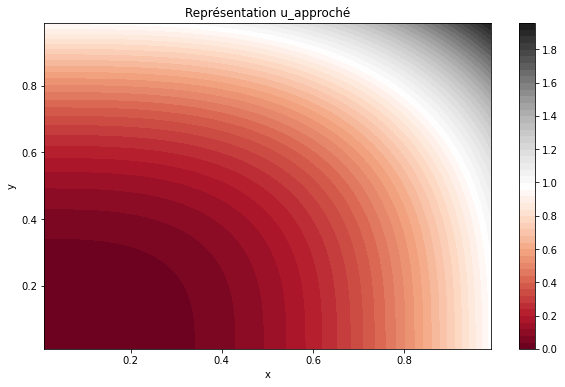

In [24]:
Df_2D.courbe(u_exact,g4,N,M)

###  courbe de u approchée

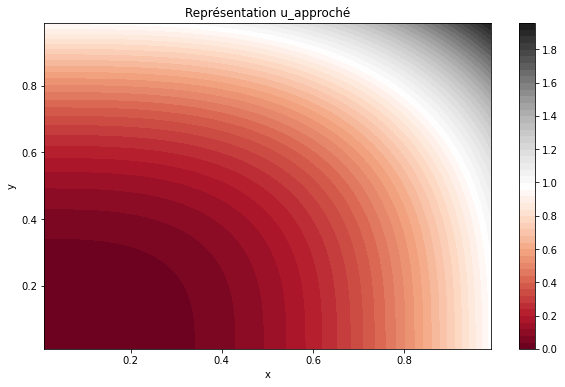

In [25]:
Df_2D.courbe(u_appr,g4,N,M)

 ### courbe d'erreur en fonction de N le nombre de points sur x et y

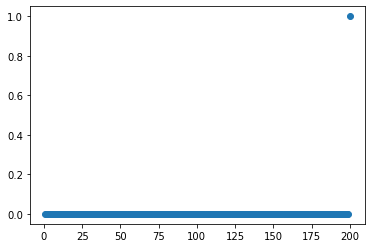

In [26]:
  #chargement  des données de test
#calcul d'erreur pour un maillage carré variant de 1 a 200
N=200
M=200
v=ones(N)
u3=ones(N)
v3=[j for j in range(1,N+1)]
k=0
for i in range(2,N+1):
    u_appr=Df_2D.calcul(f3,g3,i,i)
    u_exact=Test.valeurExact(g3,i,i)
    u3[k]=max(abs(u_appr-u_exact))
    k=k+1

plot(v3,u3,'o')

In [27]:
### vitesse de convergence

In [28]:
b=np.polyfit(np.log(v3),np.log(u3),1)[0]
b

<ipython-input-28-e8eaf0e12bbe>:1: RuntimeWarning: divide by zero encountered in log
  b=np.polyfit(np.log(v3),np.log(u3),1)[0]


nan